## Assignment 5

In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Task 1
Consider the following linear programme

$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$

subject to the constraints

$$2\, x_1 + x_2 \leq 70 $$
$$x_1 + 3\, x_2 \leq 90 $$
$$ 3\, x_1 + x_2 \geq 46 $$
$$ x_1 + 4\, x_2 \geq 52 $$

with $x_1 \geq 0$ and $x_2 \geq 0$.

### 1.1

Sketch the feasible set for this problem.

To do this I will first hardcode each constraint

In [4]:
def constraint1(x):
    return 70-2*x

def constraint2(x):
    return 30 -(x/3)

def constraint3(x):
    return 46 - 3*x

def constraint4(x):
    return 13- x/4

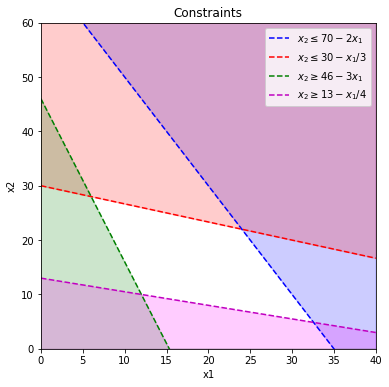

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

y_lim = 60
x_lim = 40

x = np.arange(0.0, 40.1, 0.1)


ax.plot(x, constraint1(x), "b--", label = "$x_{2} \leq 70-2x_{1}$")
ax.fill_between(x, constraint1(x), y_lim, color='blue', alpha=.2)

ax.plot(x, constraint2(x), "r--", label = "$x_{2} \leq 30 - x_{1}/3$")
ax.fill_between(x, constraint2(x), y_lim, color='red', alpha=.2)

ax.plot(x, constraint3(x), "g--", label = "$x_{2} \geq 46 - 3x_{1} $")
ax.fill_between(x, 0, constraint3(x), color='green', alpha=.2)

ax.plot(x, constraint4(x), "m--", label = "$x_{2} \geq 13 - x_{1}/4$")
ax.fill_between(x, 0, constraint4(x), color='magenta', alpha=.2)

ax.set_xlim(0, x_lim)
ax.set_ylim(0, y_lim)

ax.set_xlabel('x1')
ax.set_ylabel('x2')

ax.set_title('Constraints')

ax.legend()
plt.show()

The feasible shape is shown on the plot above where the area removed by each constraint shown by each seperate colour. The constraint lines are dotted to show that solutions exist on the lines. We can see that the feasible section is a polygon.

### 1.2
Determine the coordinates of the vertices of the feasible set in $\mathbb{R}^2$ and thereby determine the solution of the problem.

To tackle this part of the assignment I will solve each vertex separately using matrix solvers. 

In [6]:
line1 = np.array([2, 1])
line2 = np.array([1, 3])
line3 = np.array([3, 1])
line4 = np.array([1, 4])

sol = np.array([70, 90, 46, 52])

#solving each vertex seperately
vertex1 = np.linalg.solve(np.vstack((line1, line2)), sol[0:2].reshape(-1, 1))
vertex2 = np.linalg.solve(np.vstack((line2, line3)), sol[1:3].reshape(-1, 1))
vertex3 = np.linalg.solve(np.vstack((line3, line4)), sol[2:4].reshape(-1, 1))
vertex4 = np.linalg.solve(np.vstack((line1, line4)), np.vstack((sol[0], sol[3])))


The above code calculates the vertices, I shall now plot them on the original plot above to ensure accuracy.

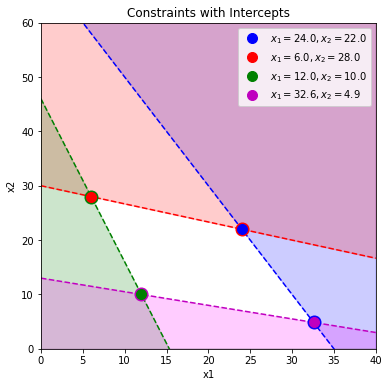

In [7]:
fig1, ax1 = plt.subplots(1, 1, figsize=(6, 6))

ax1.plot(x, constraint1(x), "b--")
ax1.fill_between(x, constraint1(x), y_lim, color='blue', alpha=.2)

ax1.plot(x, constraint2(x), "r--")
ax1.fill_between(x, constraint2(x), y_lim, color='red', alpha=.2)

ax1.plot(x, constraint3(x), "g--")
ax1.fill_between(x, 0, constraint3(x), color='green', alpha=.2)

ax1.plot(x, constraint4(x), "m--")
ax1.fill_between(x, 0, constraint4(x), color='magenta', alpha=.2)

ax1.set_xlim(0, x_lim)
ax1.set_ylim(0, y_lim)

ax1.set_xlabel('x1')
ax1.set_ylabel('x2')

ax1.plot(vertex1[0], vertex1[1], 'o', color = 'red', markersize = 13)
ax1.plot(vertex1[0], vertex1[1], 'o', color = 'blue', markersize = 10, label = f"$x_{1} = {vertex1[0].item():.1f}, x_{2} = {vertex1[1].item():.1f}$")

ax1.plot(vertex2[0], vertex2[1], 'o', color = 'green', markersize = 13)
ax1.plot(vertex2[0], vertex2[1], 'o', color = 'red', markersize = 10, label = f"$x_{1} = {vertex2[0].item():.1f}, x_{2} = {vertex2[1].item():.1f}$")

ax1.plot(vertex3[0], vertex3[1], 'o', color = 'm', markersize = 13)
ax1.plot(vertex3[0], vertex3[1], 'o', color = 'green', markersize = 10, label = f"$x_{1} = {vertex3[0].item():.1f}, x_{2} = {vertex3[1].item():.1f}$")

ax1.plot(vertex4[0], vertex4[1], 'o', color = 'blue', markersize = 13)
ax1.plot(vertex4[0], vertex4[1], 'o', color = 'm', markersize = 10, label = f"$x_{1} = {vertex4[0].item():.1f}, x_{2} = {vertex4[1].item():.1f}$")


ax1.set_title('Constraints with Intercepts')

ax1.legend()
plt.show()

Now that I have the vertices I shall determine the vertex that minimises the given equation: 
$$\min_{\substack{(x_1, x_2) \in \mathbb{R}^2} } -40\, x_1 - 60\, x_2$$
This is done below iteratively.

In [8]:
def find_min(vertices):
    for vertex in vertices:
        result = []
        result.append(-40*vertex[0] - 60*vertex[1])
    return vertices[np.argmin(result)]
    
vertices = [vertex1, vertex2, vertex3, vertex4]
minimum = find_min(vertices)
print(f'The vertex that minimises the function is {minimum.reshape(1,2)[0]}')

The vertex that minimises the function is [24. 22.]


## Task 2 -  Dantzig simplex algorithm

### 2.1 

Write the above problem in standard form. Find a basic feasible vector in $\mathbb{R}^6$ with $x_1 = 12$ and $x_2 = 10$.


$$2\, x_1 + x_2 + \eta_{1} = 70 $$
$$x_1 + 3\, x_2 + \eta_{2} = 90 $$
$$ -3\, x_1 - x_2 + \eta_{3} = -46 $$
$$ -x_1  -4\, x_2 + \eta_{4} =  -52 $$

with $x_1 \geq 0, x_2 \geq 0, \eta_{1} \geq 0, \eta_{2} \geq 0, \eta_{3} \geq 0, \eta_{4} \geq 0$.

For $x_{1} = 12$ and $x_{2} = 10$ a basic feasible vector $(x_{1}, x_{2}, \eta_{1}, \eta_{2}, \eta_{3}, \eta_{4}) = (12, 10, 36, 48, 0, 0)$

### 2.2 

Write a code in Python that implements the Dantzig simplex algorithm in its simplest form.

To implment the simplex algorithm we need to manipulate the above constraints and equations. We have the feasible vector $x^{T} = (12, 10, 36, 48, 0, 0)$ where 0's are called non-basic variables and non-zeros are called basic variables. This means we have the matrix: $$\underline{\underline{A}} = \begin{bmatrix} 2 & 1 & 1 & 0 & 0 & 0 \\ 1 & 3 & 0 & 1 & 0 & 0 \\ -3 & -1 & 0 & 0 & 1 & 0 \\ -1 & -4 & 0 & 0 & 0 & 1 \end{bmatrix}$$

and the cost function: $c^{T} = (-40, -60, 0, 0, 0, 0)$ and vector $b^{T} = (70, 90, -46, -52)$ 

The algorithm works by at each stage arranging the columns based on the order of the basic/non basic elements within the feasible vector. This then allows calculation of the non basic vector that when increased above zero leads to the largest change in the objective function through: 
$$ (\delta f)_{k} = x_{k} (c_{k} - c_{B}^{T}A_{B}^{-1}a_{k})$$ Where subscript $b$ refers to only the basic columns of the feasible set and subscript $k$ refers to the $k^{th}$ column of the matrix from which the non basic variable was taken.

Once this has been found we chose the basic variable which minimises the ratio:
$$x_{k} = \frac{(x_{B})_{i}}{\omega_{i}}$$
where $\omega_{i} = (A_{B}^{-1}a_{k})_{i}$.

In [9]:
initial_vector = np.array([[12], [10], [36], [48], [0], [0]])

sol = np.array([[70], [90], [-46], [-52]])

obj = np.array([[-40], [-60], [0], [0], [0], [0]])

A = np.array([[2, 1, 1, 0, 0, 0], [1, 3, 0, 1, 0, 0], [-3, -1, 0, 0, 1, 0], [-1, -4, 0, 0, 0, 1]])
#print(A[:, :4])



def dantzig_simplex(A, c, x):

    #rearrange feasible vector so have zeros (non-basic variables at the end)
    
    #find length of basic vector
    basic_indices = np.argwhere(x[:, 0]>0).T[0]

    #truncation A for the basic indices
    A_basic = A[:, basic_indices]
    c_basic = c[basic_indices]

    #selecting the non-basic variable to make basic
    indice_list = []
    delta_f = []
    for k in np.argwhere(x[:, 0] == 0).T[0]:
        x_test = x[k] + 5#dont know what value to use here
        a_k = A[:, k].reshape(len(A), 1)
        #calculate the change that increasing this variable has on the obj func(greatest negative value of delta f)
        A_basic_inv = np.linalg.inv(A_basic)
        delta_f.append(x_test*(c[k]-c_basic.T@A_basic_inv@a_k))
        indice_list.append([k])

    #checking to see if the solution is optimal
    if np.all(np.array(delta_f) > 0):
        return x
        
    #finding indice of non basic variable that caused the greatest change
    x_k_indice = indice_list[np.argmin(delta_f)]

    #selecting the basic variable to make non-basic
    ratio_list = []
    omega = A_basic_inv@a_k
    for i in np.argwhere(x[:, 0] > 0).T[0]:
        ratio_list.append(x[i]/omega[i])

        
    #finding indice on basic variable that reduces to zero first
    x_k = np.min(ratio_list) 
    x_i_indice = np.argmin(ratio_list)

    #swapping xi for xk to create a new feasible vector
    x[x_k_indice] = x[x_i_indice]
    x[x_i_indice] = x_k
    
            
dantzig_simplex(A, obj, initial_vector)

I could not get the above code to work as I was not sure how the swapping aspect worked, I believe I have identified the right variables to swap but was unsure how to increase the non basic variable and how to swap them. I have left the above code in with the hope of some feedback as to what I should have been doing. To complete the assignment I have instead implemented the simplex algorithm in the tableau form below. The code is well commented to describe the process taken within the algorithm.

In [10]:
#creating initial tableua
int_table = np.array([[2, 1, 1, 0, 0, 0, 0, 70], [1, 3, 0, 1, 0, 0, 0, 90], [-3, -1, 0, 0, -1, 0, 0, 46], 
                      [-1, -4, 0, 0, 0, -1, 0, 52], [-40, -60, 0, 0, 0, 0, 1, 0]])

#converting to floats for arithmatic
int_table = int_table.astype(float)

def tableau_simplex(int_table):
    #visibility for user
    print('Initial Tableau: ', int_table)
    
    while True:
        #test to see if optimal solution, if so then return the values of the feasible vector
        if np.all(int_table[-1:]>=0):
            return int_table[:, -1]
            break
            
        #finding the location of the most negative value
        min_indice = np.argmin(int_table[-1:])
        
        #chosing pivot
        chosen_column = int_table[:,min_indice]
        feasible_column = int_table[:, -1]
        divisors = []
        for i in range(0, len(chosen_column)-1):
            divisors.append(feasible_column[i]/chosen_column[i])

        #chosing smallest non negative value as the pivot
        divisors = np.array(divisors)
        min_val_arg = np.argmin(divisors[divisors>=0])
        min_val = divisors[min_val_arg]

        #dividing all in the same row as pivot value by the pivot
        pivot_row = int_table[min_val_arg, :]

        int_table[min_val_arg, :] = pivot_row/ min_val
        
        #finding pivot element and then dividing row by pivot element so that the pivot element = 1
        pivot_element = int_table[min_val_arg, min_indice]
        int_table[min_val_arg, :] = pivot_row/ pivot_element
    
        #setting all other elements in the pivot column to zero
        pivot_column = int_table[:, min_val_arg]
        for i in range(0, len(pivot_column)):
            #ignoring row containing pivot element
            if i != min_val_arg:
                int_table[i, :] = int_table[i, :] - pivot_row*pivot_column[i] #updating tableua
                
        #printing what is happening for a user
        print('-----------------')
        print('Pivot row arg = ', min_val_arg)
        print('Pivot col arg = ', min_indice)
        print('-----------------')
        print('Next Iteration: ', int_table)
        
        #process is then repeated until vector is optimal
                   
    
optimal_vector = tableau_simplex(int_table)

print(f'The optimal vertice is x1 = {optimal_vector[0]}, and x2 = {optimal_vector[1]}, with value {optimal_vector[-1]}')


Initial Tableau:  [[  2.   1.   1.   0.   0.   0.   0.  70.]
 [  1.   3.   0.   1.   0.   0.   0.  90.]
 [ -3.  -1.   0.   0.  -1.   0.   0.  46.]
 [ -1.  -4.   0.   0.   0.  -1.   0.  52.]
 [-40. -60.   0.   0.   0.   0.   1.   0.]]
-----------------
Pivot row arg =  1
Pivot col arg =  1
-----------------
Next Iteration:  [[ 1.66666667e+00  0.00000000e+00  1.00000000e+00 -3.33333333e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  4.00000000e+01]
 [ 3.33333333e-01  1.00000000e+00  0.00000000e+00  3.33333333e-01
   0.00000000e+00  0.00000000e+00  0.00000000e+00  3.00000000e+01]
 [-2.66666667e+00  0.00000000e+00  0.00000000e+00  3.33333333e-01
  -1.00000000e+00  0.00000000e+00  0.00000000e+00  7.60000000e+01]
 [ 3.33333333e-01  0.00000000e+00  0.00000000e+00  1.33333333e+00
   0.00000000e+00 -1.00000000e+00  0.00000000e+00  1.72000000e+02]
 [-2.00000000e+01  0.00000000e+00  0.00000000e+00  2.00000000e+01
   0.00000000e+00  0.00000000e+00  1.00000000e+00  1.80000000e+03]]
---------

The above print out shows the proccess the algorithm has gone through to find the optimal vertex of the feasible set. We can see that is has arrived at the same solution as we have arrived at previously where we did the iteration ourselves. The simplex method should be implemented when calculating vertices and iterating manually in infeasable due to the magnitude or complexuty of the problem.

## Task 3 - Stiff ODE's

Using the following problem as a setting for our exploration:

$$
\frac{d u }{d t} = -\lambda (u - \cos(t)), \hspace{0.1cm} \text{ with } \hspace{0.1cm} u(0) = 0.
$$

$t \in [0,1]$ can represent a good starting point. Note that parameter $\lambda \in \mathbb{R}^+$ (and its value) represents a key part of the problem.

As this part of the assignemnt requires comparisson of several different discrete methods it is desirable to have an analytical solution. This can be derived through the usual technique for solving ODE's, with the intergrating factor = $e^{\lambda t}$ leading to:
$$e^{\lambda t} u = \frac{e^{\lambda t}(\text{sin}(t) + \lambda^{2} \text{cos}(t))}{\lambda^{2} + 1}+C$$

Where as $u(0) = 0, C = -\frac{\lambda^{2}}{\lambda^{2}+1}$ giving:

$$ u(t) = \frac{(\lambda \text{sin}(t) + \lambda^{2} \text{cos}(t))}{\lambda^{2} + 1} - \frac{\lambda^{2}}{\lambda^{2}+1}$$

Also, throughout this section of the assignemnt, as we are trying to investigate stiff/non-stiff problems I will be using adaptive timestepping where the time step h is given by: 
$$
h_{\text{new}} = \left(\frac{\epsilon}{\Delta}\right)^\frac{1}{n}h_{\text{old}}
$$

where n is the order of the time stepping method, $\epsilon$ is an error threshold to be set, and
$$
\Delta = \left|u^{\rm B}_{i+1} - u^{\rm S}_{i+1} \right|.
$$
where B referes to one time step of size h and s refers to two time steps of h/2.
So before I begin the actual assigned tasks within this assignment, I shall provide code to calculate the analytical solution, the actual ODE and the time step required throughout.



In [11]:
def grad(u, t, lamda):
    return -1*lamda*(u - np.cos(t))

def analytical_sol(t, lamda):
    return (lamda*np.sin(t) + lamda**2*np.cos(t))/(lamda**2+1) - (lamda**2/(lamda**2+1))*np.e**(-lamda*t)

def adaptive_step(n, h, eps, delta, sigma):
    return (((eps/delta)**(1/n))*h)*sigma
    

### 3.1 

Implement the Forward Euler Method and evaluate its performance for your choice of values of $\lambda$ of up to $100$. Powers of two are perhaps a sensible choice, but in general try 4-6 values that cover a sufficiently wide range of the interval. Remember to plot your findings (using subplots may be useful here) and comment on your results as a function of the value of $\lambda$.

The forward Euler method can be used to discretise the above function through:
$$u_{i+1} = u_{i} + h \frac{d u_{i} }{d t} + O(h^{2}) = u_{i}-\lambda h(u_{i}-\text{cos}(t))) + O(h^{2})$$
Where h is the step size which shall start as a value < 1.

In [12]:
def forward_euler(u0, h, lamda, eps, adaptive_steps):
    u = [u0, ]
    t = [0, ]
    while t[-1] < 1:
        #adaptive time stepping
        if adaptive_steps:
            h_old = h
            u_b = u[-1] + h_old*grad(u[-1], t[-1], lamda)
            u_s_1 = u[-1] + (h/2)*grad(u[-1], t[-1], lamda)
            u_s = u_s_1 + (h/2)*grad(u_s_1, t[-1]+h_old/2, lamda)
            delta = np.abs(u_s - u_b)
            
            sigma = 0.9 #make sure it is within error threshold
            
            #forward euler is a first order global method
            h_new = adaptive_step(1, h_old, eps, delta, sigma)
            
            #want to make sure that most the time step can change is of factor of two, i.e half or double
            if h_new < h_old:
                h = np.max([h_new, h_old/2])
                
            else:
                h = np.min([h_new, h_old*2])
                
                
        
        #euler forward
        u.append(u[-1] + h*grad(u[-1], t[-1], lamda))
        
        #creating time array for plotting
        t.append(t[-1] + h)
    return u, t


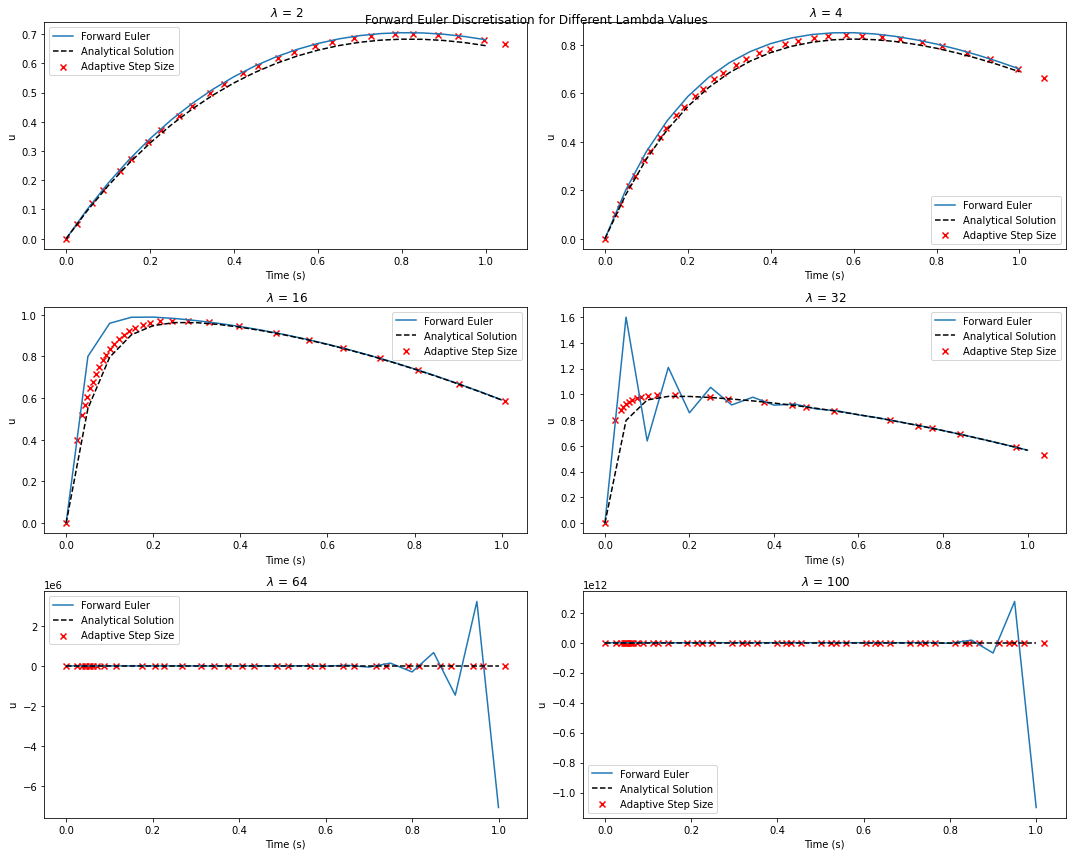

In [13]:
h = 0.05
u0 = 0
eps = 1e-3
lamda_range = [2, 4, 16, 32, 64, 100]
time = np.arange(0, 1+h, h)


fig2, axes = plt.subplots(3, 2, figsize=(15, 12))

j = 0
k = 0
euler_error = []
# euler_adap_error = []
for l in lamda_range:
    u_list_adap, adap_time_points = forward_euler(u0, h, l, eps, True)
    u_list, time_points = forward_euler(u0, h, l, eps, False)
    an_sol = analytical_sol(time, l)
    axes[j][k].plot(time_points, u_list, label = 'Forward Euler')
    axes[j][k].scatter(adap_time_points[::], u_list_adap[::], label = f"Adaptive Step Size", marker = 'x', color = 'red')
    axes[j][k].plot(time, an_sol, color = 'black', ls = '--', label = 'Analytical Solution')
    axes[j][k].set_xlabel('Time (s)')
    axes[j][k].set_ylabel('u')
    axes[j][k].legend()
    axes[j][k].set_title(f" $\lambda$ = {l}")
    
    euler_error.append(np.linalg.norm(u_list - an_sol))
#     euler_adap_error.append(np.linalg.norm(u_list_adap - an_sol))
    
    k +=1
    if k==2:
        k = 0
        j +=1
        
fig2.suptitle(f'Forward Euler Discretisation for Different Lambda Values') 
fig2.tight_layout()

plt.show()

The plots above clearly show the differences between both the adaptive and normal Forward Euler method. Firstly we can see that the adaptive step size method has better represented the curved section of the function, taking smaller time steps at the areas where the function is changing more,  as $\lambda$ increases and does not seem to have the issue of 'blowing up' at large $\lambda$ values (at least not too the same scale) as seen in the normal forward euler method. 

### 3.2 

Try an implicit scheme such as the implicit trapezoidal method. Overlay results for easy comparisson.

The implicit trapezoidal scheme is defined by:
$$u_{i+1} = u_{i} + \frac{h}{2}(F_{i} + F_{i+1}) + O(h^{3})$$
where $F$ refers to the derivative of $u$. This method is implicit as $u_{i+1}$ relies on the derivative at that time, $F_{i+1}$ to be solved. Due to this implicity to solve the ODE's using this method, a newton raphson solve is required at each time step to provide an initial approx for $u_{i+1}$.
This is given by: 
$$u_{n+1} = u_{n} - \frac{F_{n}}{F'_{n}}$$

However the above equation can also be linearised through rearranging the equation to:
$$u_{i+1} = \frac{u_{i}(1-\frac{\lambda h}{2})+ \frac{\lambda h}{2}\text{cos}(t_{i}) + \frac{\lambda h}{2}\text{cos}(t_{i+1})}{1 + \frac{\lambda h}{2}}$$
<!-- Therefor to solve this we need to calculate the dervative of the original ODE, this is given by:
$$\frac{d^{2} u}{d t^{2}} = -\lambda F(u) - \lambda \text{sin}(t) = \lambda^{2}(u - \text{cos}(t)) - \lambda \text{sin}(t) $$ -->

In [14]:
def new_trapz_u(u, t, h, lamda):
    x = (lamda*h)/2
    return (u*(1-x)+x*np.cos(t)+x*np.cos(t + h))/(1+x)
    

def implicit_trapz(u0, h, lamda, adaptive_steps):
    u = [u0, ]
    t = [0, ]
    while t[-1] < 1:
        if adaptive_steps:
            
            h_old = h
            u_b = new_trapz_u(u[-1], t[-1], h_old, lamda)
            u_s_1 = new_trapz_u(u[-1], t[-1], h_old/2, lamda)
            u_s = u_s_1 + new_trapz_u(u_s_1, t[-1]+(h_old/2), h_old/2, lamda)
            delta = np.abs(u_s - u_b)

            sigma = 0.9 #make sure it is within error threshold
            
            #traps is a second order global method
            h_new = adaptive_step(2, h_old, eps, delta, sigma)
            
            #want to make sure that most the time step can change is of factor of two, i.e half or double
            if h_new < h_old:
                h = np.max([h_new, h_old/2])
                
            else:
                h = np.min([h_new, h_old*2])
                
        u.append(new_trapz_u(u[-1], t[-1], h, lamda))
        t.append(t[-1] + h)
    return u, t
                 

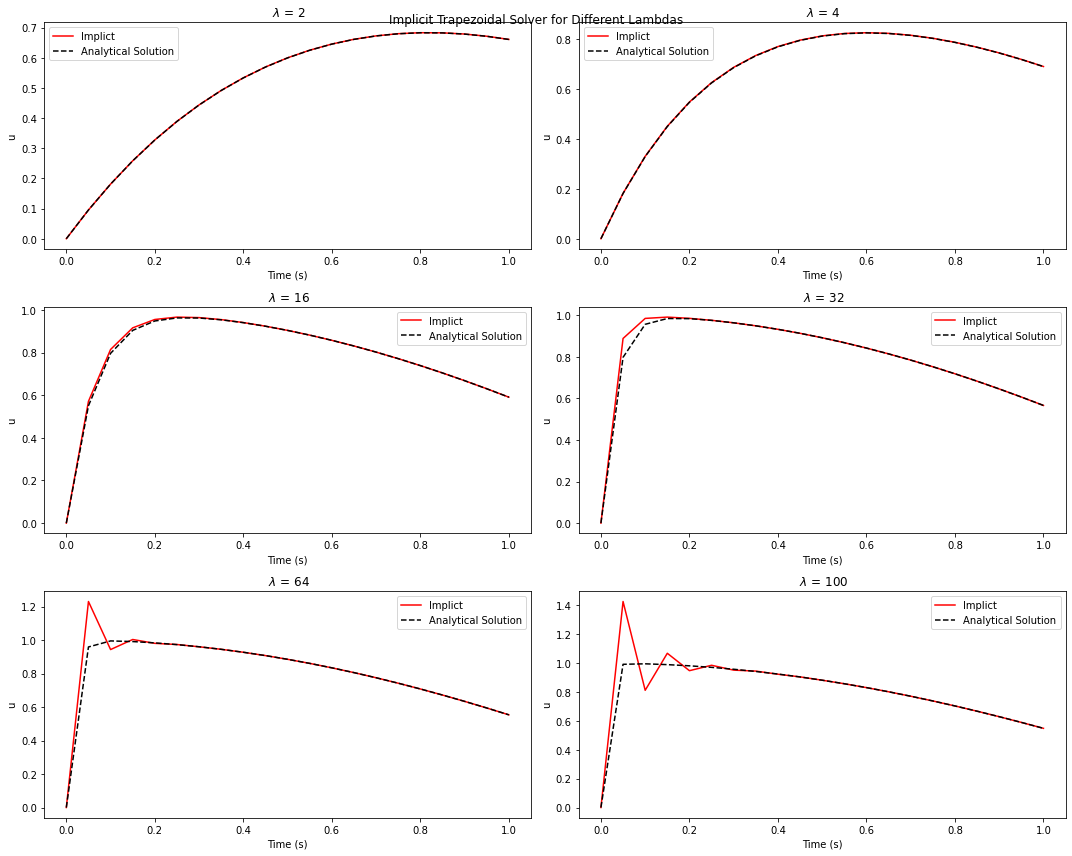

In [15]:
fig3, axes1 = plt.subplots(3, 2, figsize=(15, 12))

j = 0
k = 0
implicit_error = []
for l in lamda_range:
    implicit_u, u_time = implicit_trapz(u0, h, l, False)
    #implicit_u_adap, time_adap = implicit_trapz(u0, h, l, True) #ran into errors, stiff problem??
    axes1[j][k].plot(u_time, implicit_u, label = 'Implict', color = 'red')
    #axes1[j][k].plot(time_adap, implicit_u_adap, label = 'Adaptive Steps')
    axes1[j][k].plot(time, analytical_sol(time, l), color = 'black', ls = '--', label = 'Analytical Solution')
    axes1[j][k].set_xlabel('Time (s)')
    axes1[j][k].set_ylabel('u')
    axes1[j][k].set_title(f" $\lambda$ = {l}")
    axes1[j][k].legend()
    
    
    implicit_error.append(np.linalg.norm(implicit_u-analytical_sol(time, l)))
    
    k +=1
    if k==2:
        k = 0
        j +=1
        
fig3.suptitle('Implicit Trapezoidal Solver for Different Lambdas') 
fig3.tight_layout()
plt.show()


We can see here that the implicit solver has been more succesful at emmulating the true solution throughout the range of lambda, with no 'blow ups' within the given time range. However, when attempting to implement the adaptive time stepping the time steps continually decrease and so no solution can be achieved within a reasonable time frame as h is so small, I am not sure what is leading to this error and I have been unable to diagnose it. This means that whislt this method has been succesful for large lambda it is less successful at emmulating the bahviour when there are large changes in the analytical solution as shown by the large errors when the curve bends.

### 3.3 

Now using the Runge-Kutta 4th order scheme:
$$u_{n+1} = u_{n} + \frac{h}{6}(K_{1} + 2K_{2} + 2K_{3} + K_{4})$$
where:
$$ K_{1} = f(t_{n}, u_{n})$$
$$ K_{2} = f(t_{n} + \frac{h}{2}, u_{n} + \frac{h K_{1}}{2})$$
$$K_{3} = f(t_{n} + \frac{h}{2}, u_{n} + \frac{h K_{2}}{2})$$
$$K_{4} = f(t_{n}+h, u_{n} + h K_{3})$$

In [16]:
def new_u_RK4(u, t, h, lamda):
    
    K1 = grad(u, t, lamda)
    K2 = grad(u + ((h*K1)/2), t+(h/2), lamda)
    K3 = grad(u + ((h*K2)/2), t + (h/2), lamda)
    K4 = grad(u+(h*K3), t + h, lamda)
    
    return u + (h/6)*(K1 + 2*K2 + 2*K3 + K4)

def RK4(u0, lamda, h, adaptive_steps):
    t = [0, ]
    u = [u0, ]
    while t[-1] < 1:
        if adaptive_steps:
            u_b = new_u_RK4(u[-1], t[-1], h, lamda)
            u_s_1 = new_u_RK4(u[-1], t[-1], h/2, lamda)
            u_s = u_s_1 + new_u_RK4(u_s_1, t[-1]+h/2, h/2, lamda)
            delta = np.abs(u_s - u_b)
            #4th order method
            h = adaptive_step(4, h, eps, delta)

        u.append(new_u_RK4(u[-1], t[-1], h, lamda))
        t.append(t[-1] + h)
    return u, t


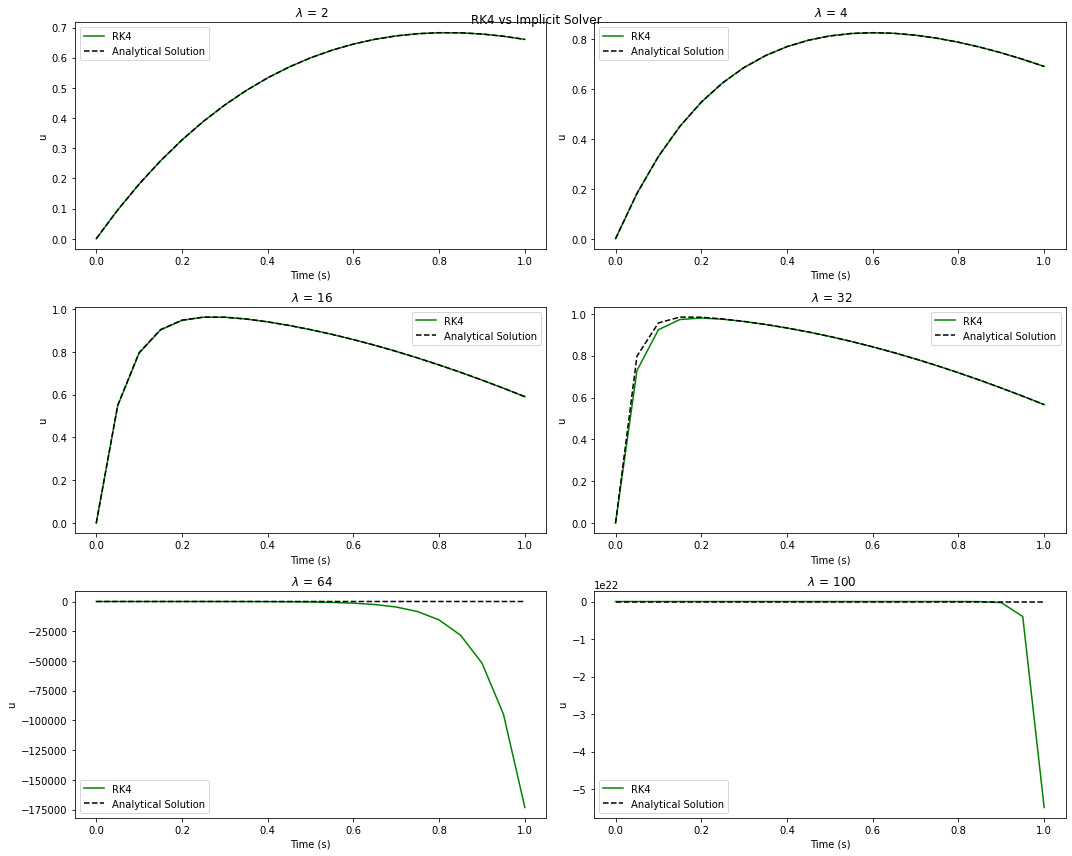

In [17]:
fig4, axes2 = plt.subplots(3, 2, figsize=(15, 12))

j = 0
k = 0
RK_error = []
for l in lamda_range:
    RK_u, RK_t = RK4(u0, l, h, False)
 #   RK_u_adap, RK_t_adap = RK4(u0, l, h, True)
    axes2[j][k].plot(RK_t, RK_u, label = 'RK4', color = 'green')
#    axes2[j][k].plot(RK_t_adap, RK_u_adap, label = 'Adaptive Steps', color = 'red')
    axes2[j][k].plot(time, analytical_sol(time, l), color = 'black', ls = '--', label = 'Analytical Solution')
    axes2[j][k].set_xlabel('Time (s)')
    axes2[j][k].set_ylabel('u')
    axes2[j][k].set_title(f" $\lambda$ = {l}")
    axes2[j][k].legend()
    
    RK_error.append(np.linalg.norm(RK_u- analytical_sol(time, l)))
    
    k +=1
    if k==2:
        k = 0
        j +=1
        
fig4.suptitle('RK4 vs Implicit Solver') 
fig4.tight_layout()
plt.show()


The Range-Kutta method above is not as accurate as I expected leading me too expect and error in my code which I have not been able to diagnose. Also again the adaptive time step has run into the same problem as with the implicit trapz method.

To compare each method I shall look at plots of the absolute error of each method as lamda increases as compared to the analytical solution.


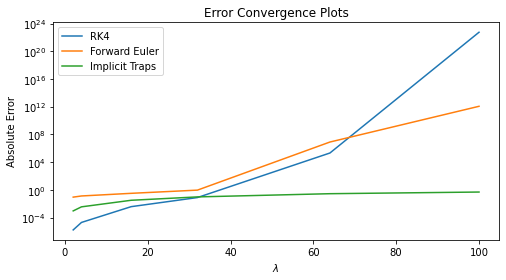

In [18]:
fig5, ax1 = plt.subplots(1, 1, figsize=(8, 4))

ax1.semilogy(lamda_range, RK_error, label = 'RK4')
ax1.semilogy(lamda_range, euler_error, label = 'Forward Euler')
ax1.semilogy(lamda_range, implicit_error, label = 'Implicit Traps')
ax1.set_xlabel('$\lambda$')
ax1.set_ylabel('Absolute Error')
ax1.set_title('Error Convergence Plots')
ax1.legend()
plt.show()

I recognise that my analysis in this section has not been of a good standard as I have been hindered by my inability to complete the adaptive time stepping within some sections although I do believe it works well within the forward Euler method. I believe the graph above is not worth commenting on as the Runge-Kutta method is clearly not correct as we would expect a much smaller error rate.

### 3.4

Solve the functions using inbuilt stiff-non stiff solvers, comment on their relative performances against previous implementations.

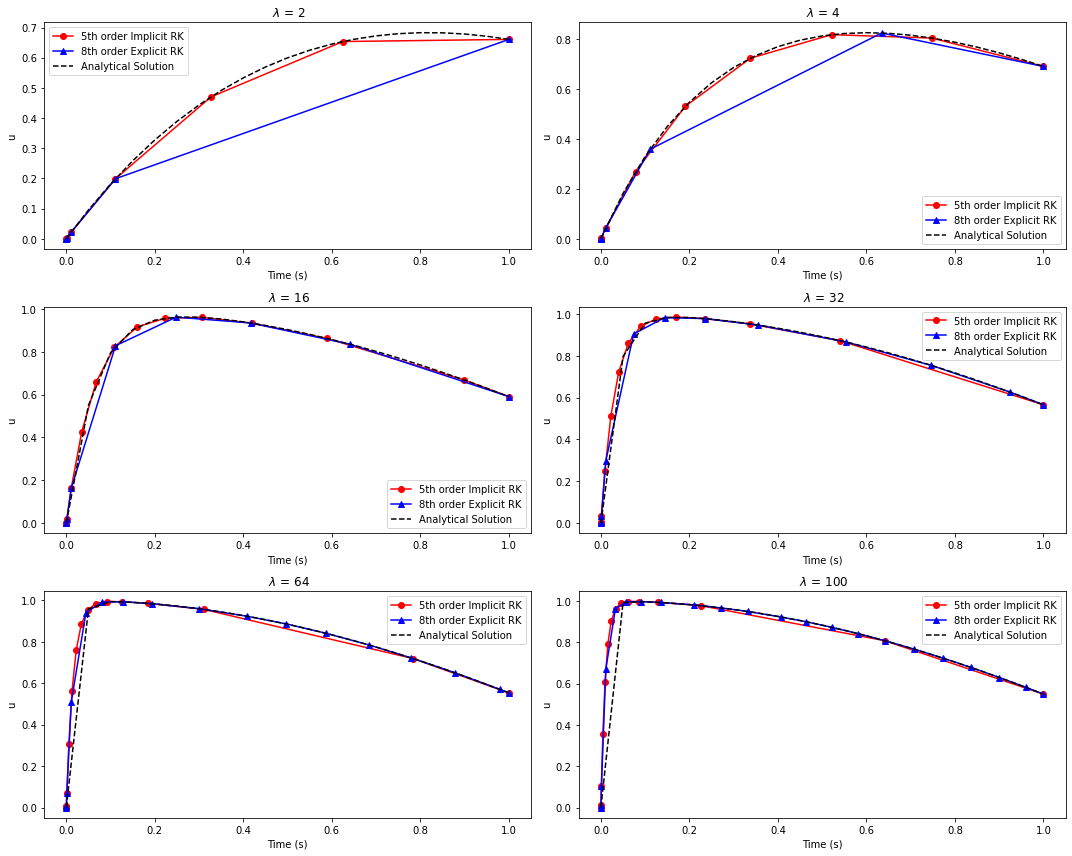

In [19]:
from scipy.integrate import solve_ivp, Radau, DOP853

def solve_grad(t, u, l):
    return -1*l*(u - np.cos(t))



fig4, axes2 = plt.subplots(3, 2, figsize=(15, 12))

j = 0
k = 0
for l in lamda_range:
    u_rad = solve_ivp(solve_grad, [0, 1], [0], method ='Radau', args = (l,))
    u_dop = solve_ivp(solve_grad, [0, 1], [0], method = 'DOP853', args=(l,))
    axes2[j][k].plot(u_rad.t, u_rad.y[0], label = '5th order Implicit RK', color = 'red', marker = 'o')
    axes2[j][k].plot(u_dop.t, u_dop.y[0], label = '8th order Explicit RK', color = 'blue', marker = '^')
    axes2[j][k].plot(time, analytical_sol(time, l), color = 'black', ls = '--', label = 'Analytical Solution')
    axes2[j][k].set_xlabel('Time (s)')
    axes2[j][k].set_ylabel('u')
    axes2[j][k].set_title(f" $\lambda$ = {l}")
    axes2[j][k].legend()
    
    k +=1
    if k==2:
        k = 0
        j +=1
        
plt.tight_layout()

The above plots show examples of two different solvers within the scipy integrate package, used for the ODE. The plots compare an 8th or explicit method and a 5th order implicit method. As seen throughout this assignment it is the implicit order method that performs best on this function as low lambda values. It can also be seen that the implicit method does not have the stiff step size problem as for lamda = 100 we can see that the step size increases again after the sharp bend for the 5th order method however it stays relatively small for the explicit method. Although as lamda has increased the 8th order method does indeed become the more accurate method, as expected, even tho the time steps are smaller. I am annoyed I was not able to derive these conclusion from my own implementations of the explicit and implicit comparissons and therefor compare them to these, so any advice would be appreciated. 

Upon a final look through I have just realised that maybe the Runge-Kutta method is right and it is just poor because it is an Explicit method as implied by the gievn python solvers in the plot above, but I am not certain of this.